<a href="https://colab.research.google.com/github/JARACH-209/DataAnalytics/blob/master/K_Nearest_Neigbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Nearest Neighbors Algorithm**
##(*Birds of Same Feather Flock Together*)
## Achal Dixit | 1801007
---

PseudoCode:

   * Initialize selectedi = 0 for all i data points from the training set
   * Select a distance metric (let’s say we use Euclidean Distance)
   * For each training data point i calculate the distancei = distance between the new prediction point and training point i
   * Choose the K parameter of the algorithm (K = number of neighbors considered), usually it’s an odd number, **this way avoiding ties in majority voting**
   * For j = 1 to K loop through all the training set data points and in each step select the point with minimum distance to the new observation (minimum distance i)
   * For each existing class count how many of the K selected data points are part of that class (voting)
   * Assign to the new observation the class with the maximum count (highest vote) — this is majority voting

###Time Complexity 
* Training : O(1)
* Testing  : O(Kn)

In [2]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline

df = pd.DataFrame(load_breast_cancer().data,columns=load_breast_cancer().feature_names)
breast_cancer = load_breast_cancer()

X = load_breast_cancer().data
Y = load_breast_cancer().target

df['target'] = Y


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###We will use Breast Cancer Dataset to understand KNN algorithm

###Breast cancer wisconsin (diagnostic) dataset
**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

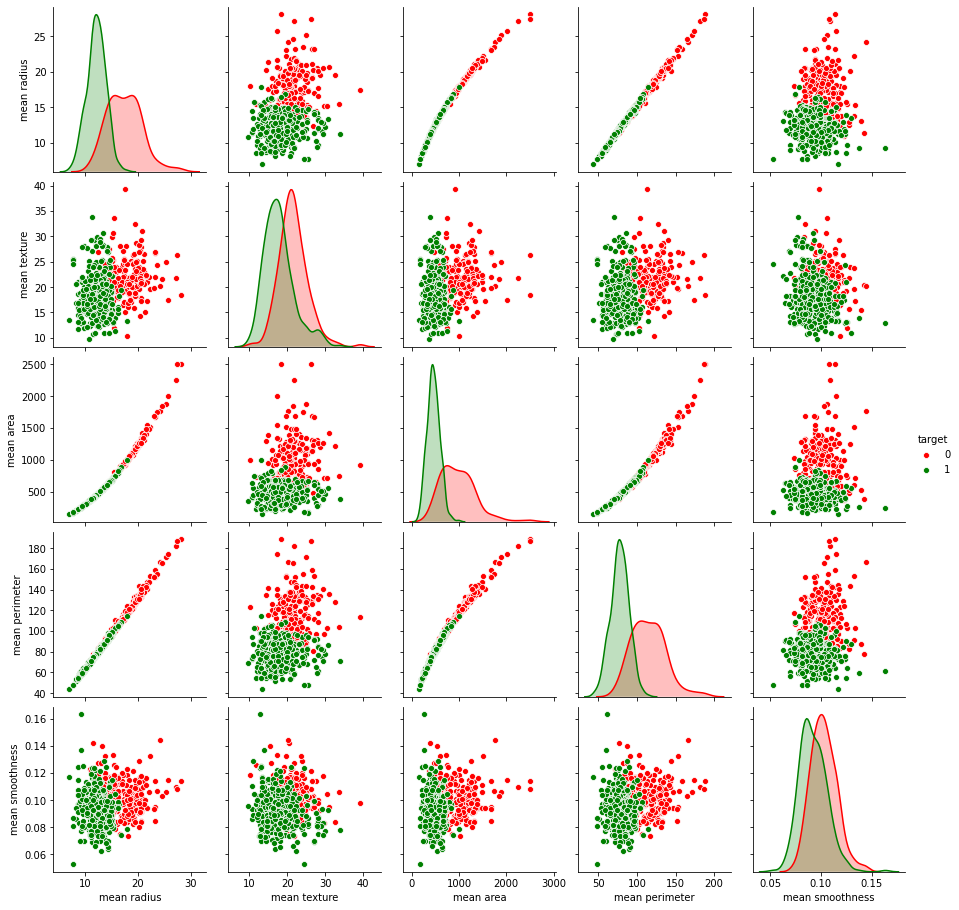

In [3]:
sns.pairplot(df, hue = 'target',palette=['r','g'], vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

Train-Test Split

In [19]:
#Train and Test set split into 80% and 20% respectively
x_train, x_rest, y_train, y_rest = train_test_split(X,Y,train_size = .8)

#Rest of the 20% set split into equal parts of Train and Validation set r
x_test, x_val, y_test, y_val = train_test_split(x_rest,y_rest,test_size = .5,random_state = 0)

#Therefore : Train = 80%, Test = 20% and Validation = 20%
print(len(x_train),len(y_train))
print(len(x_val),len(y_val))
print(len(x_test),len(y_test))

455 455
57 57
57 57


We will make a classifier and check which value of K performs well for prediction.

For KNN we need to use validation set for Hyperparameter tuning as it remembers the train set therefore the performance might get affected.

In [17]:
def knn_clf(n):
    knn = KNeighborsClassifier(n_neighbors = n,algorithm="auto")
    knn.fit(x_train,y_train)
    #Predict the response for test dataset
    Y_pred = knn.predict(x_val)
    # Model Accuracy, how often is the classifier correct?
    print("K=",n, "\t\t",round(accuracy_score(y_train, knn.predict(x_train))*100,1), "%",
           "\t",round(accuracy_score(y_val, Y_pred)*100,1), "%")
    acc = round(accuracy_score(y_val, Y_pred)*100,1)
    return knn,acc,n

Finding best K

In [22]:
best_acc = 0.0
best_clf = None
best_n = 0
clf = None
print("\t\tTraining Set\tValidation set")
for i in range(1,11):
    clf, acc, n = knn_clf(i)
    if acc > best_acc:
        best_acc = acc
        best_clf = clf
        best_n = n
y_pred = best_clf.predict(x_test)
print("\nAccuracy for our model on test set is %.2f\n" % (accuracy_score(y_test,y_pred)*100))
print("Best K = ",best_n)

		Training Set	Validation set
K= 1 		 100.0 % 	 91.2 %
K= 2 		 97.1 % 	 93.0 %
K= 3 		 95.4 % 	 94.7 %
K= 4 		 94.5 % 	 94.7 %
K= 5 		 94.3 % 	 94.7 %
K= 6 		 94.1 % 	 93.0 %
K= 7 		 94.3 % 	 94.7 %
K= 8 		 93.8 % 	 94.7 %
K= 9 		 93.8 % 	 94.7 %
K= 10 		 94.1 % 	 94.7 %

Accuracy for our model on test set is 94.74

Best K =  3


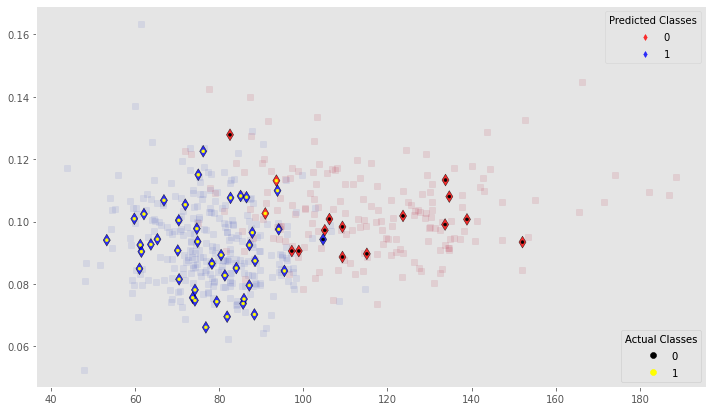

In [130]:

fig,ax = plt.subplots(figsize=(12,7))
ax.scatter(primeter_train,smooth_train,c=y_train,marker="s",alpha=.1,cmap="coolwarm_r")
scatter1 = ax.scatter(perimeter_test,smooth_test,c= y_test,alpha=.8,marker="d",cmap="bwr_r",s=70,edgecolor="black")
scatter2 = ax.scatter(perimeter_test,smooth_test,c= y_pred,marker=".",s=35,cmap="gnuplot")
ax.grid(False)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter1.legend_elements(),
                    loc="upper right", title="Predicted Classes")
ax.add_artist(legend1)

legend2 = ax.legend(*scatter2.legend_elements(),
                    loc="lower right", title="Actual Classes")
ax.add_artist(legend2)


Performance of KNN can be improved by using :
* KD-Trees
* Ball-Trees

Since we have chosen the algorithm to be "AUTO" it choses 
accordingly.

----------
Overfitting in KNN !!!

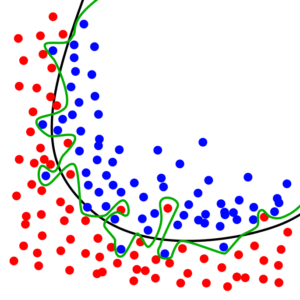

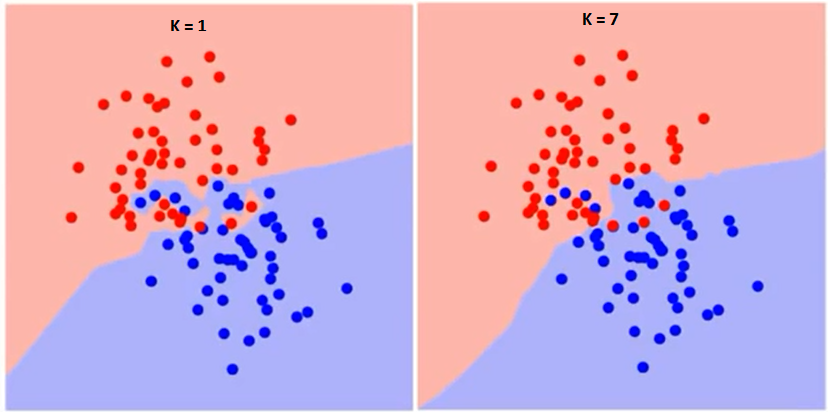

In [35]:
primeter_train = pd.DataFrame((pd.DataFrame(x_train))[2])
perimeter_test = pd.DataFrame(pd.DataFrame(x_test)[2])
perimeter_val = pd.DataFrame(pd.DataFrame(x_val)[2])
smooth_train = pd.DataFrame(pd.DataFrame(x_train)[4])
smooth_test = pd.DataFrame(pd.DataFrame(x_test)[4])
smooth_val = pd.DataFrame(pd.DataFrame(x_val)[4])

In [ ]:
y_pred_test = best_clf.predict(x_test)
y_pred_val = best_clf.predict(x_val)
y_pred_train = best_clf.predict(x_train)

In [58]:
plt.style.use(['ggplot'])

In [118]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(12,7))
    plt.contourf(xx, yy, Z, alpha=0.25)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=5)
    plt.ylabel("Feature-2",fontsize=5)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

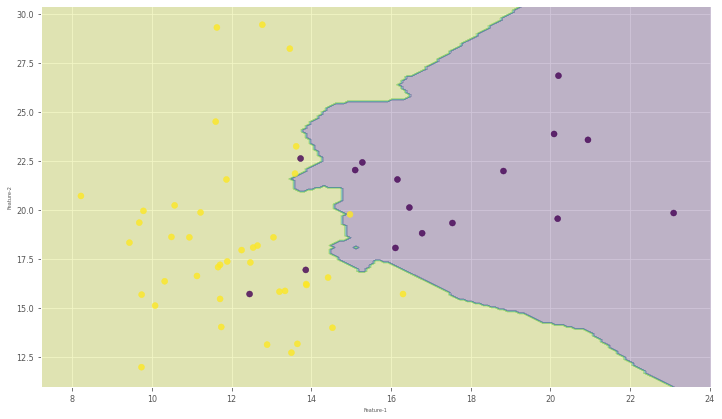

In [136]:
plot_decision_boundaries(x_test,y_test,KNeighborsClassifier,n_neighbors=3)

##Overfitting in our Model
K = 1

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

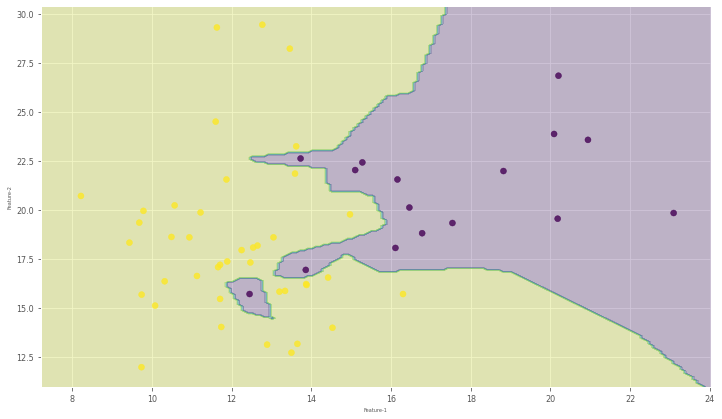

In [120]:
plot_decision_boundaries(x_test,y_test,KNeighborsClassifier,n_neighbors=1)

##Underfitting Problem in our KNN model
### K = 20

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

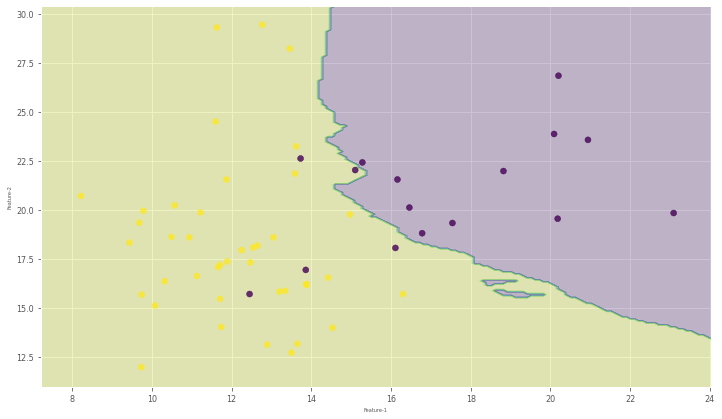

In [133]:
plot_decision_boundaries(x_test,y_test,KNeighborsClassifier,n_neighbors=20)